In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", 1) #here out dataset is in the 2nd  sheet of the excel workbook
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape #to find out the rows and columns of the dataset

(5000, 14)

In [5]:
df.isnull().sum() #to check whether there is null values or not

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
df.drop(['ID', 'ZIP Code'], axis = 1, inplace = True) #removing unnecessary columns, An axis of 1 refers to columns  while an axis of 0 would refer to rows

In [7]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [11]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
# 5 NUmber summay

import plotly.express as ps

In [12]:
boxplot = ps.box(df, y = ['Age', 'Experience', 'Income', 'Family', 'Education'])
boxplot.show()  #Experience and Income variable has some outliers

In [10]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [13]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>],
       [<Axes: title={'center': 'CD Account'}>,
        <Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>]], dtype=object)

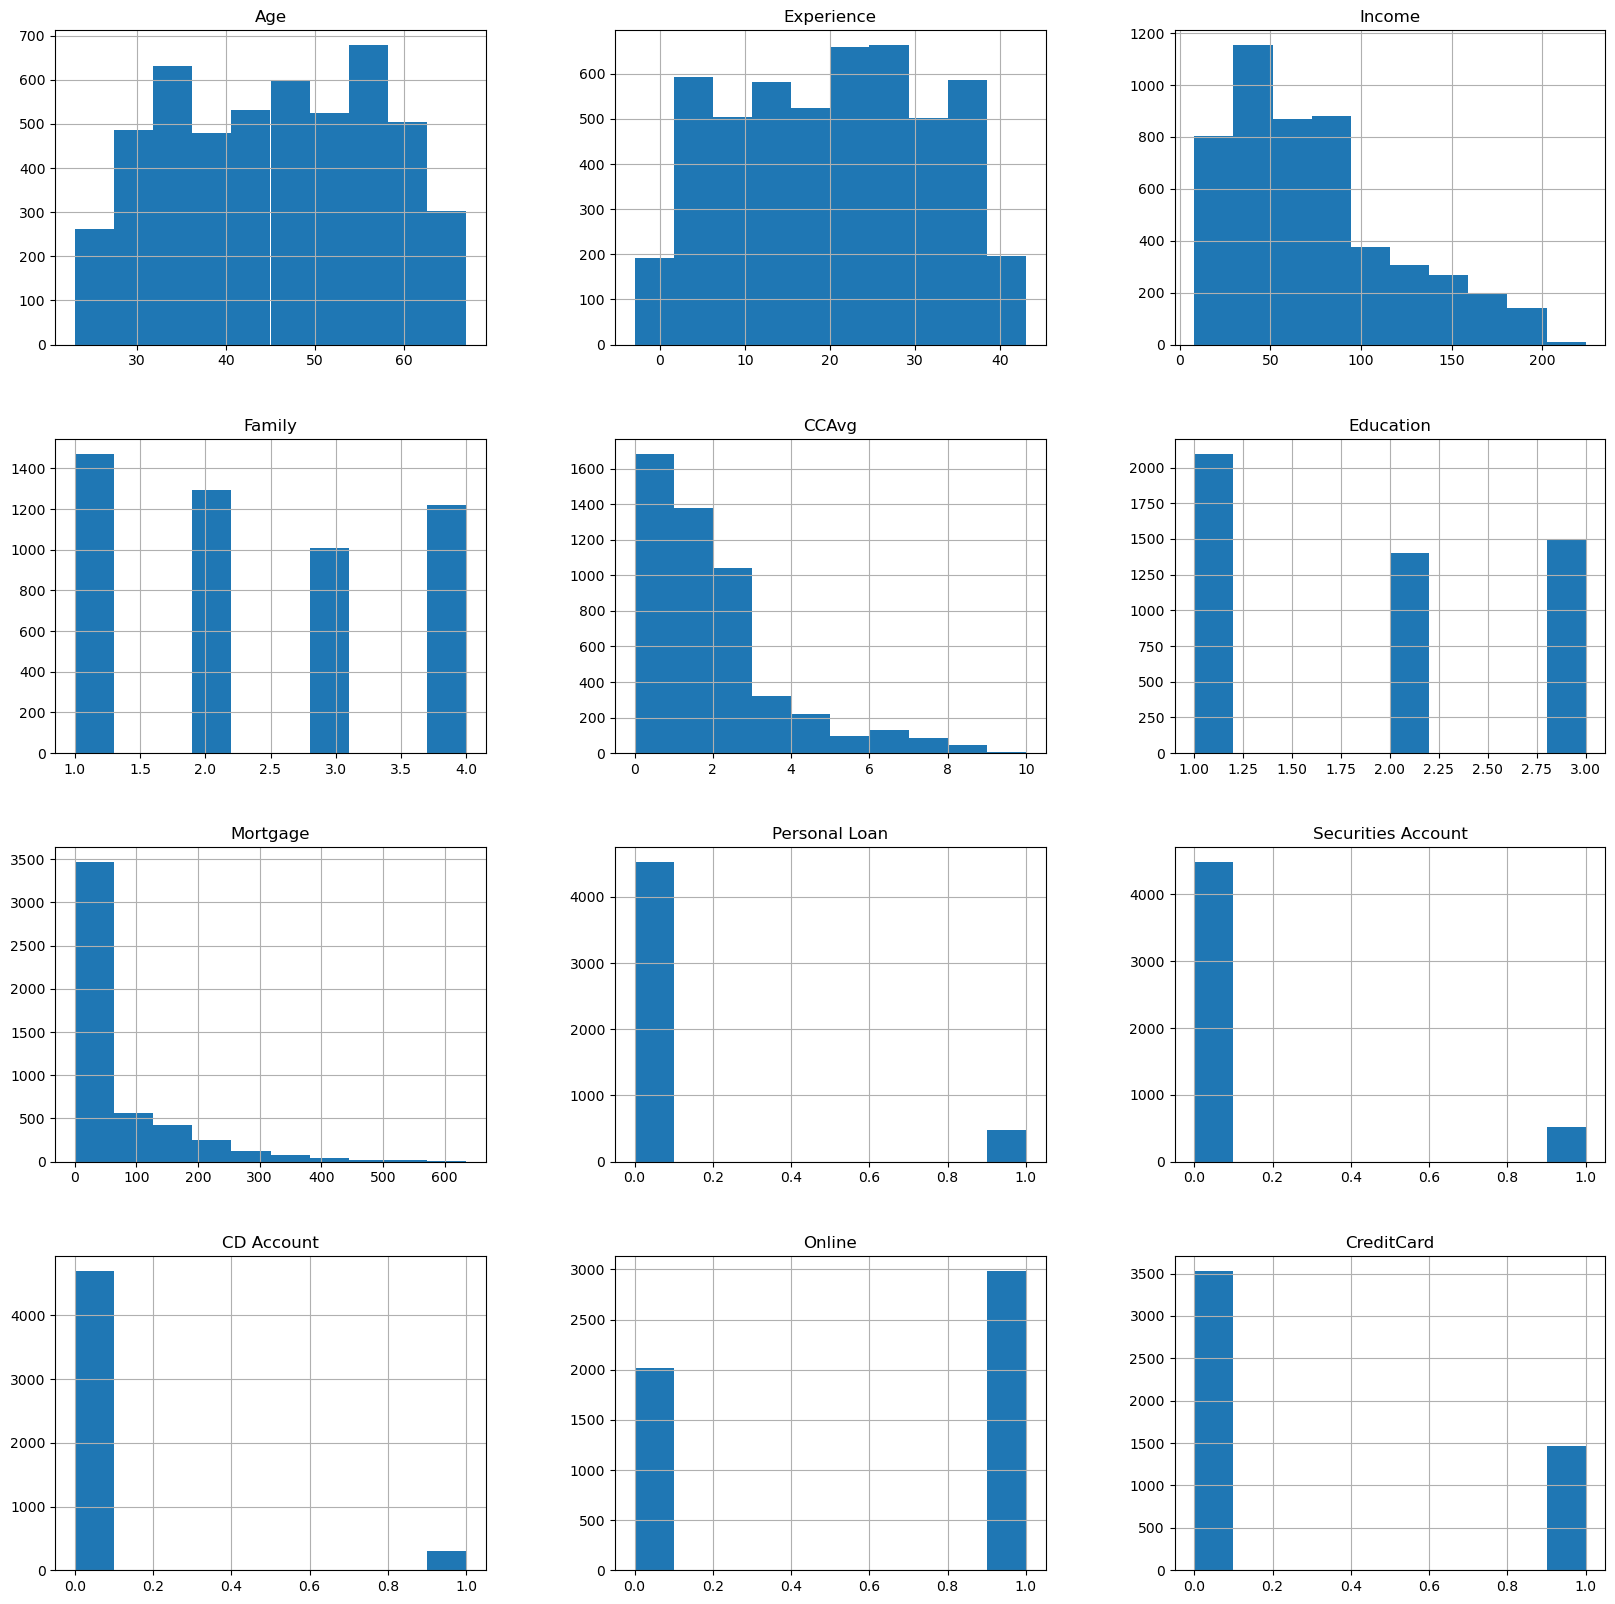

In [14]:
df.hist(figsize = (20,20))

In [16]:
import seaborn as sns

<Axes: xlabel='Experience', ylabel='Density'>

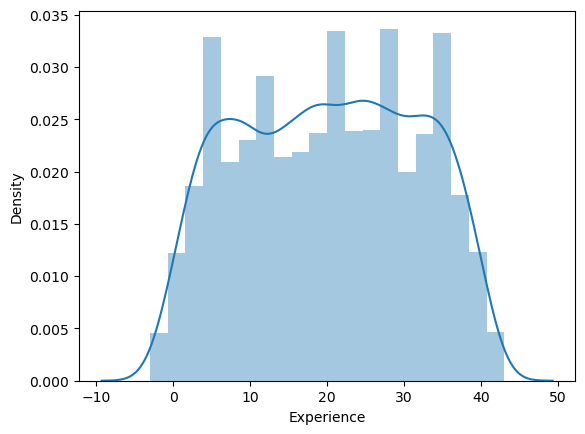

In [17]:
sns.distplot(df['Experience']) #here we can see that Experience column has some negative values which is unrealistic. So we will handle this variable

In [18]:
df['Experience'].mean()

20.1046

In [20]:
count_negative_experience = (df['Experience'] < 0).sum()
count_negative_experience  #we have total 52 rows that have negative values of Experience

52

In [24]:
total_rows = len(df)
count_negative_experience = (df['Experience'] < 0).sum()
percentage_negative_experience = (count_negative_experience / total_rows) * 100
percentage_negative_experience  #So we have total 1.04% negative experience records out of the total dataset.


1.04

In [25]:
negative_exp =df[df['Experience']<0]
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


In [26]:
negative_exp.shape

(52, 12)

In [29]:
type(negative_exp)

pandas.core.frame.DataFrame

In [ ]:
sns.distplot()

<Axes: xlabel='Age', ylabel='Density'>

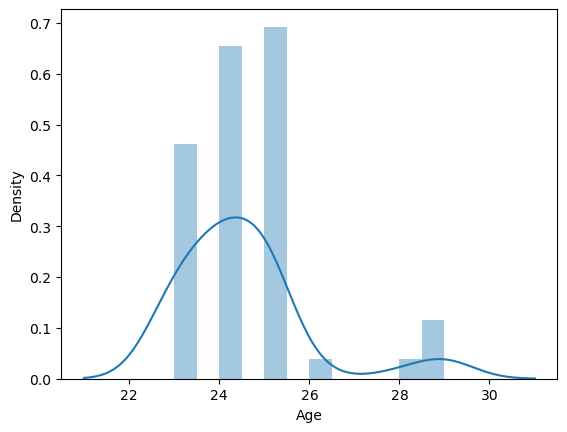

In [27]:
sns.distplot(negative_exp['Age']) #people from the age interval 22 to 30 has recorded negative experience

In [30]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [31]:
negative_exp.size

624

In [32]:
print('There are {} elements which has negative values for experience, approx {} %'.format(negative_exp.size , 
                                ((negative_exp.size/df.size)*100)))

There are 624 elements which has negative values for experience, approx 1.04 %


# now we will fill the negative values of the Experience column with mean experience

In [36]:
data = df.copy() #we have copied the original data

In [37]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [38]:
data.shape

(5000, 12)

In [39]:
df.shape

(5000, 12)

In [40]:
import numpy as np

In [41]:
data['Experience'] = np.where(data['Experience'] < 0,
                             data['Experience'].mean(),
                             data['Experience'])

In [42]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [43]:
negative_experience_count=(data['Experience']<0).sum()
negative_experience_count  #no more negative values of experience column

0

In [44]:
data['Experience'].mean()

20.328687839999997

In [30]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977008,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977008,1.000000,-0.049054,-0.045488,-0.048719,0.018097,-0.013378,-0.014045,-0.000462,0.005502,0.013455,0.008833
Income,-0.055269,-0.049054,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045488,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.048719,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.018097,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013378,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014045,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000462,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005502,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<Axes: >

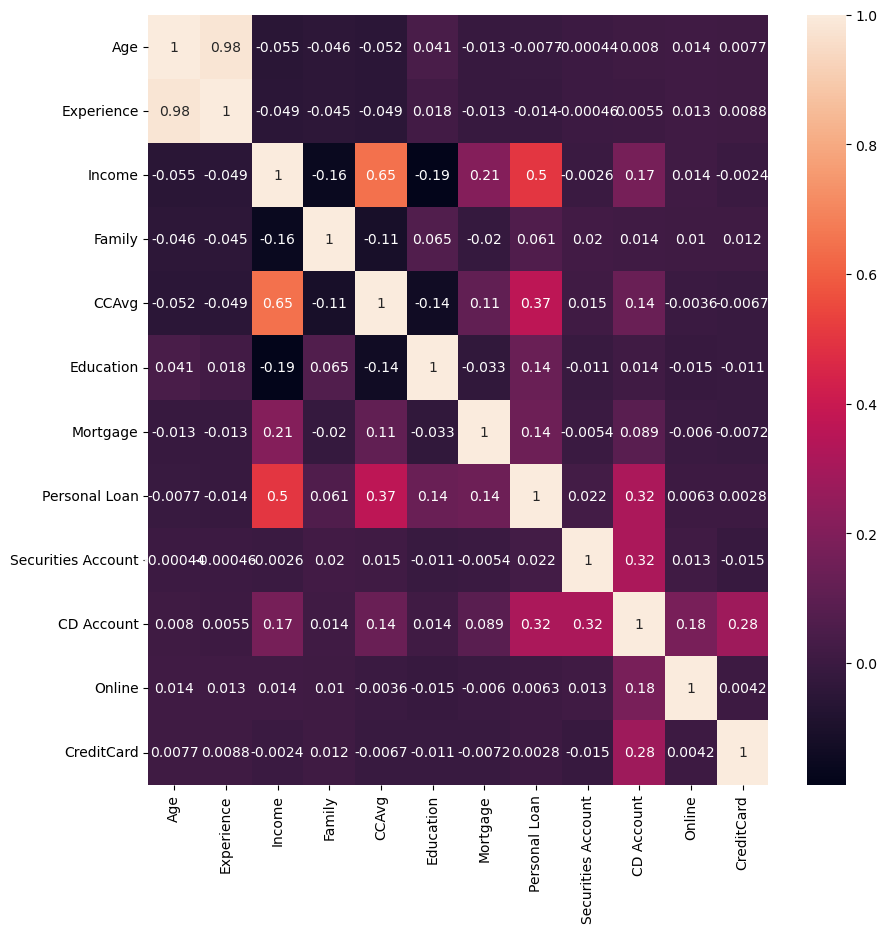

In [45]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True)

In [46]:
data = data.drop(['Experience'], axis = 1) #here the correlation between Age and Experience is very high. That's why we are dropping the Experience Column

In [47]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [48]:
# Education
data['Education'].unique()

array([1, 2, 3], dtype=int64)

In [49]:
def experience(x):
    if x == 1:
        return "Undergrade"
    if x == 2:
        return "Graduate"
    if x == 3:
        return "Prefessional Person"

In [50]:
data['EDU'] = data['Education'].apply(experience)

In [56]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrade
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrade
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrade
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [52]:
data['EDU'].unique()

array(['Undergrade', 'Graduate', 'Prefessional Person'], dtype=object)

In [55]:
ed = data.groupby('EDU').count()
ed


,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
EDU,,,,,,,,,,,
Graduate,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403
Prefessional Person,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501
Undergrade,2096,2096,2096,2096,2096,2096,2096,2096,2096,2096,2096


In [57]:
education_dis = data.groupby('EDU')['Age'].count()

In [67]:
education_dis

EDU
Graduate               1403
Prefessional Person    1501
Undergrade             2096
Name: Age, dtype: int64

In [68]:
type(education_dis)

pandas.core.series.Series

In [ ]:
import plotly.express as ps

In [50]:
fig = ps.pie(data, values =education_dis, names =education_dis.index, title = 'Pie Chart')
fig.show()

In [71]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU'],
      dtype='object')

In [72]:
data['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

In [73]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [74]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [75]:
def security(y):
    if(y['Securities Account'] == 1) & (y['CD Account'] == 1):
        return "Holds Securities & Depostie"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 0):
        return "Does not hold Securites & Depsotie account"
    if(y['Securities Account'] == 1) & (y['CD Account'] == 0):
        return "Holds only Scurites account"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 1):
        return "Holds only Deposite account"

In [76]:
data['Account_holder_category'] = data.apply(security, axis = 1)

In [77]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU,Account_holder_category
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrade,Holds only Scurites account
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrade,Holds only Scurites account
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrade,Does not hold Securites & Depsotie account
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Does not hold Securites & Depsotie account
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Does not hold Securites & Depsotie account


In [80]:
values  = data['Account_holder_category'].value_counts()
values

Does not hold Securites & Depsotie account    4323
Holds only Scurites account                    375
Holds only Deposite account                    155
Holds Securities & Depostie                    147
Name: Account_holder_category, dtype: int64

In [83]:
fig = ps.pie(data, values =values, names =values.index, title = 'Pie Chart')
fig.show()

In [84]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU', 'Account_holder_category'],
      dtype='object')

In [85]:
ps.box(data, x = 'Education', y = 'Income', facet_col = 'Personal Loan')

In [86]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU', 'Account_holder_category'],
      dtype='object')

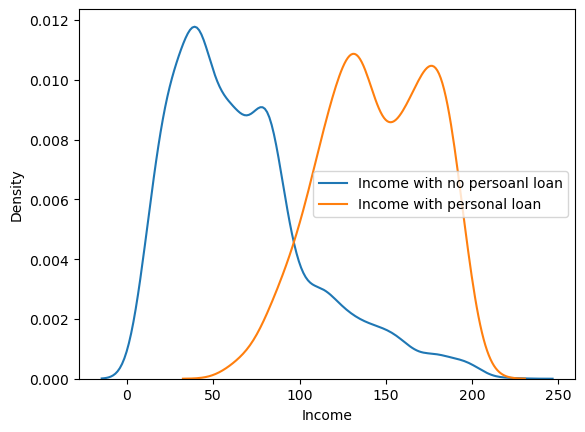

In [87]:
sns.distplot(data[data['Personal Loan'] == 0]['Income'], hist = False, 
            label = "Income with no persoanl loan")

sns.distplot(data[data['Personal Loan'] == 1]['Income'], hist = False,
            label = "Income with personal loan")
plt.legend()

In [88]:
def plot(col1, col2, lable1, lable2, title):
    sns.distplot(data[data[col2] == 0][col1], hist = False, 
            label =lable1)
    
    sns.distplot(data[data[col2] == 1][col1], hist = False, 
            label = lable2)
    
    plt.legend()
    plt.title(title)

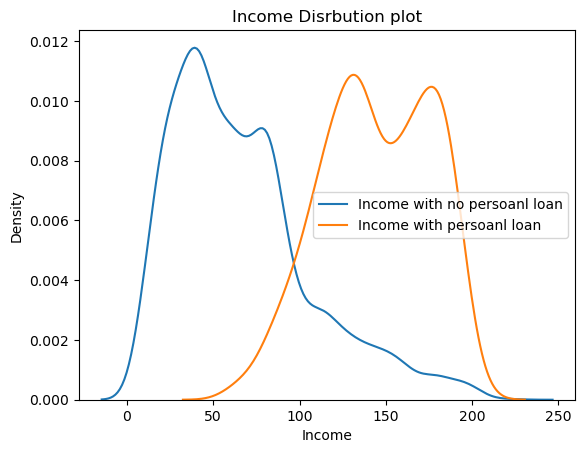

In [89]:
plot('Income', 'Personal Loan', "Income with no persoanl loan", "Income with persoanl loan", "Income Disrbution plot")

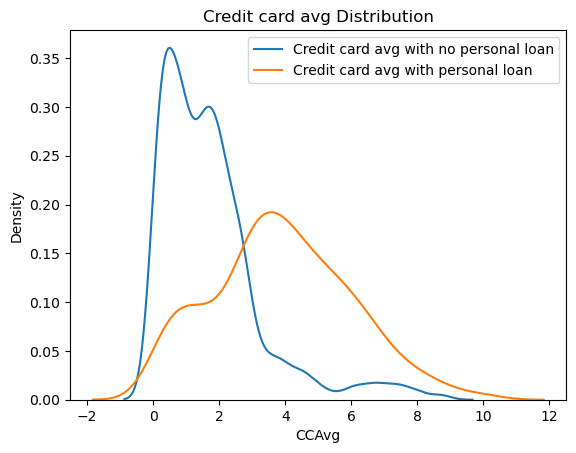

In [90]:
plot('CCAvg','Personal Loan',
     'Credit card avg with no personal loan',
     'Credit card avg with personal loan',
     'Credit card avg Distribution')

In [80]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU', 'Account_holder_category'],
      dtype='object')

In [81]:
col = ['Securities Account',
      'Online', 
      'Account_holder_category',
      'CreditCard']

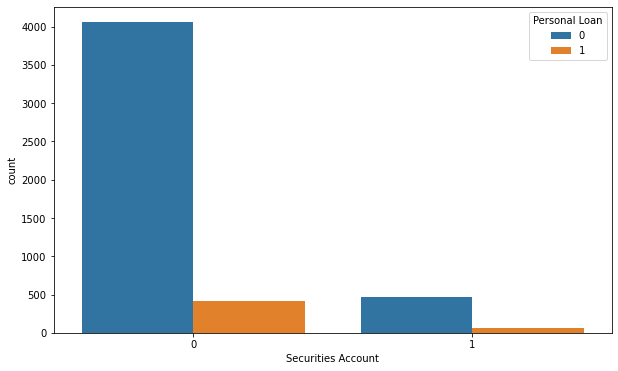

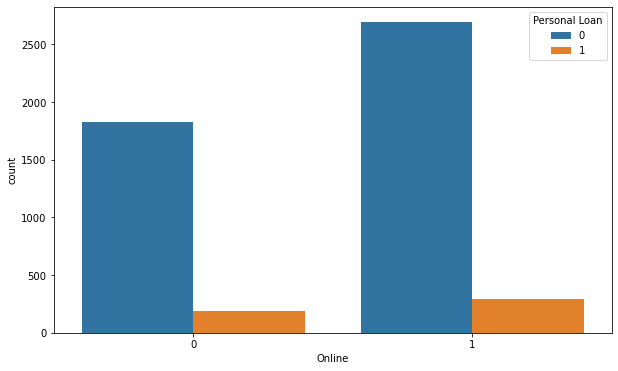

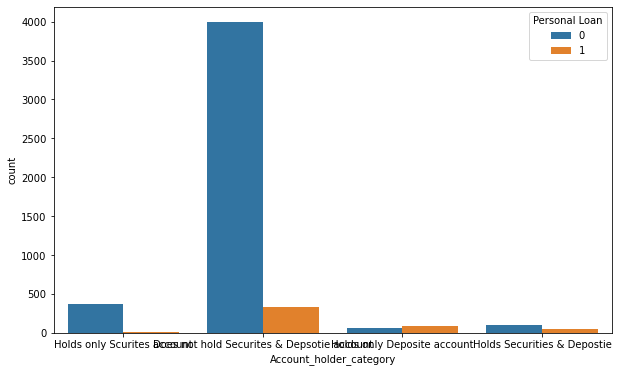

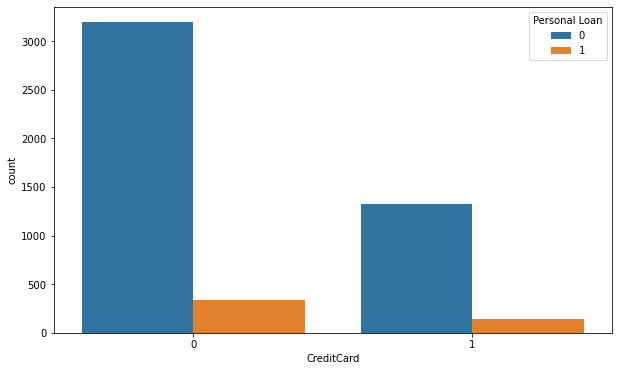

In [84]:
for i in col:
    plt.figure(figsize = (10,6))
    sns.countplot(x = i, data = data, hue = 'Personal Loan')

# As we have found that our dataset has some skewness, now we will use IQR to solve this issue

In [91]:
from scipy.stats import zscore

In [92]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

IQR = q3 - q1
print(IQR)

Age                    20.0
Income                 59.0
Family                  2.0
CCAvg                   1.8
Education               2.0
Mortgage              101.0
Personal Loan           0.0
Securities Account      0.0
CD Account              0.0
Online                  1.0
CreditCard              1.0
dtype: float64


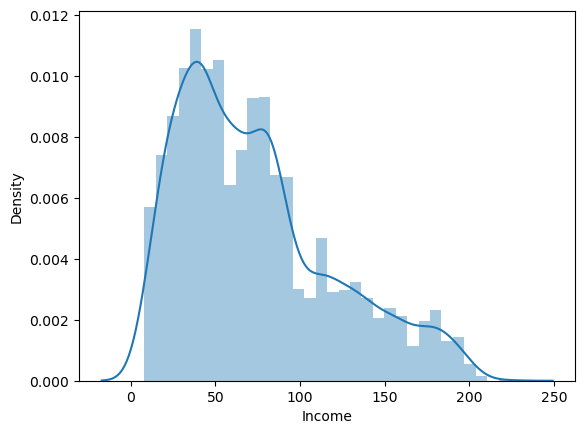

In [94]:
sns.distplot(data['Income'])
plt.show()